#Support Vector Machine

Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
df=pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

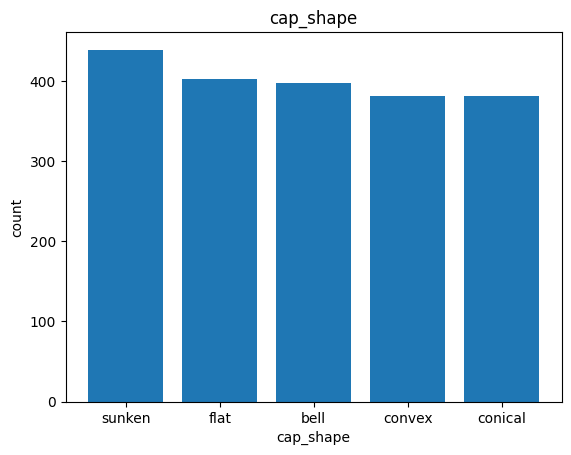

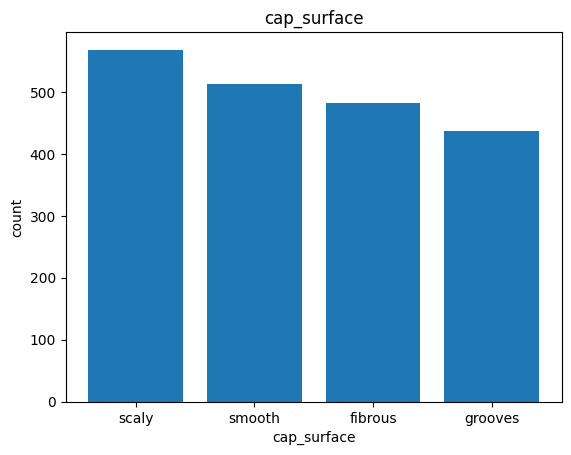

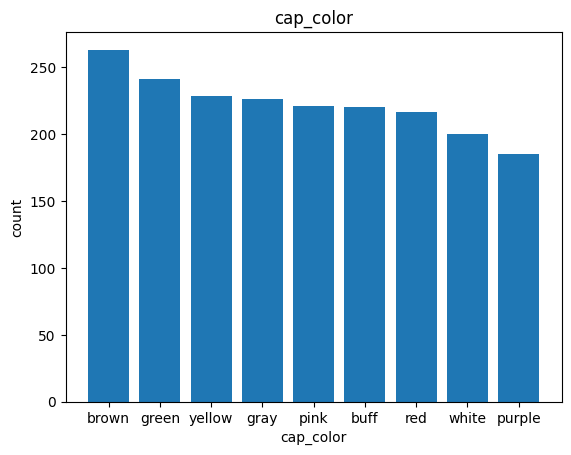

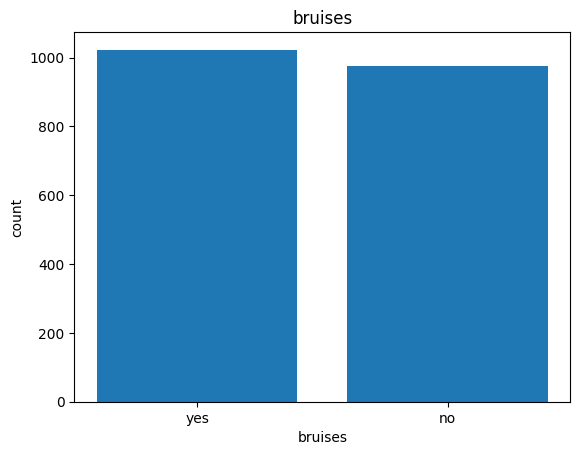

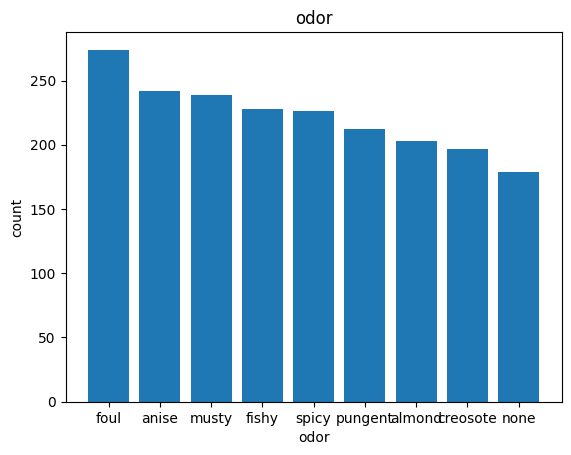

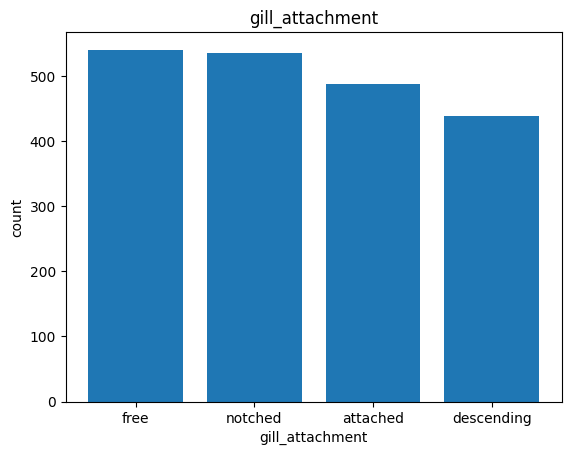

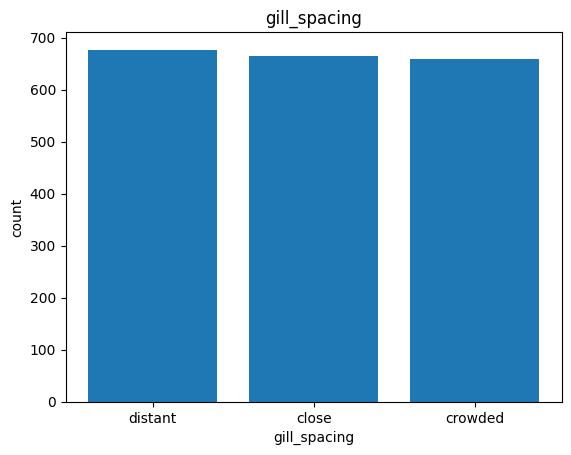

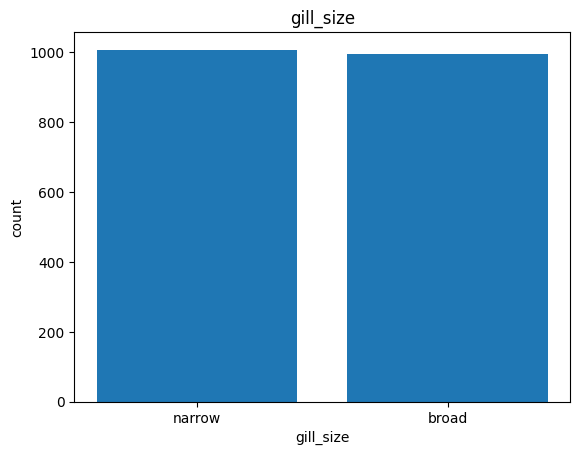

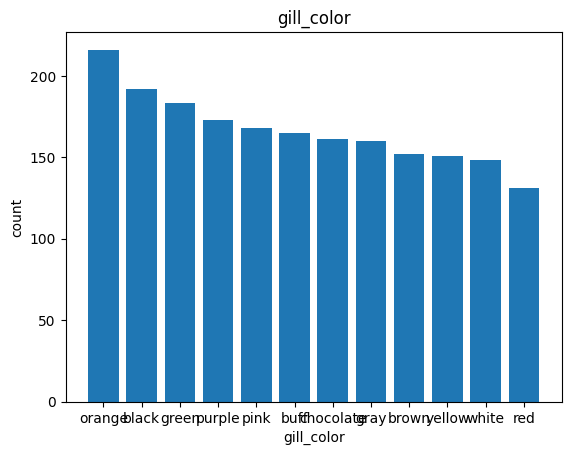

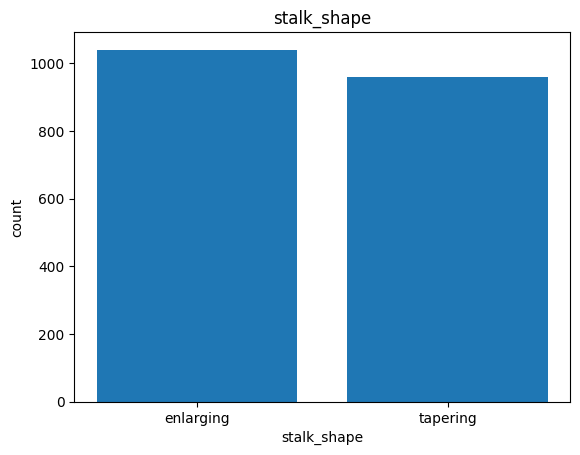

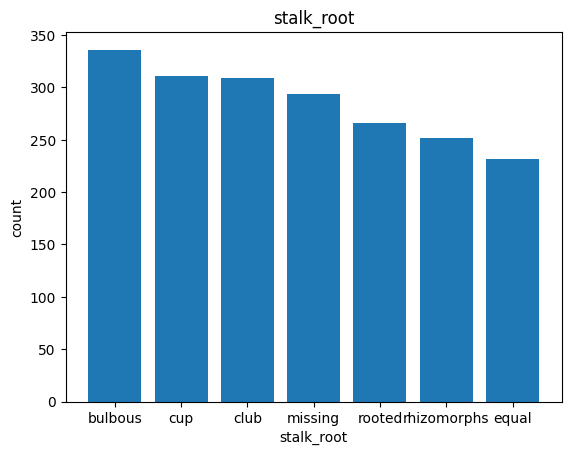

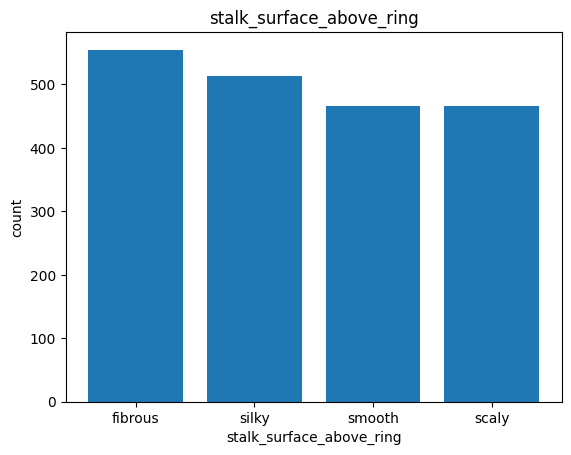

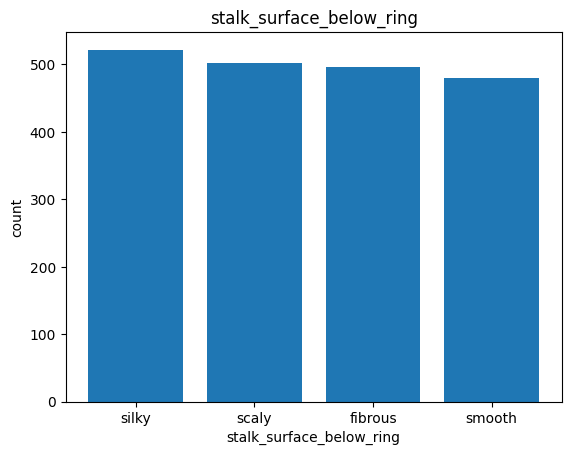

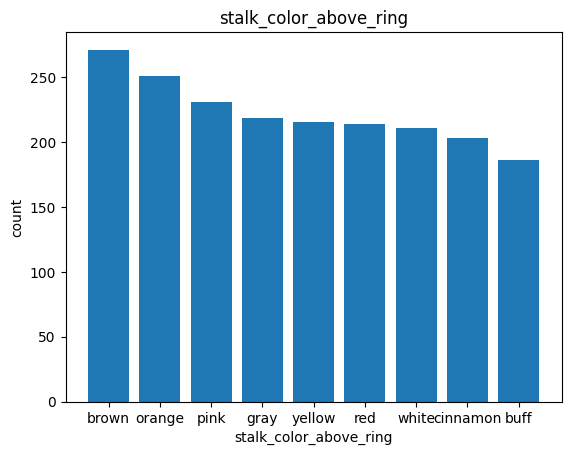

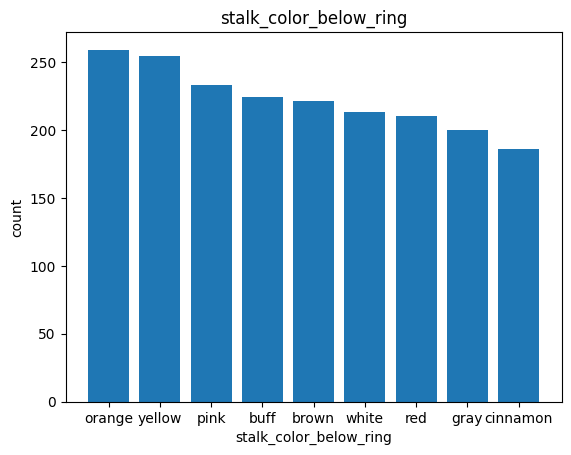

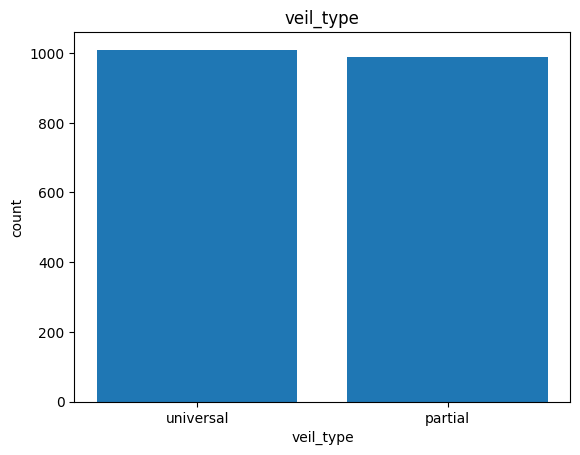

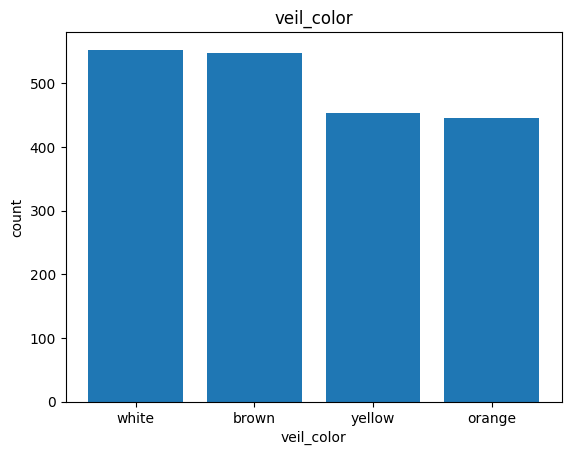

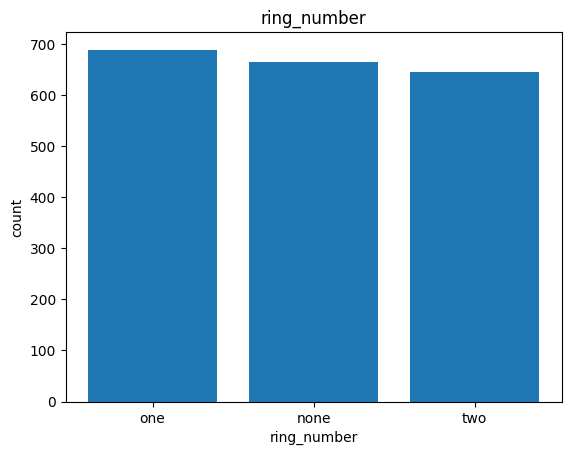

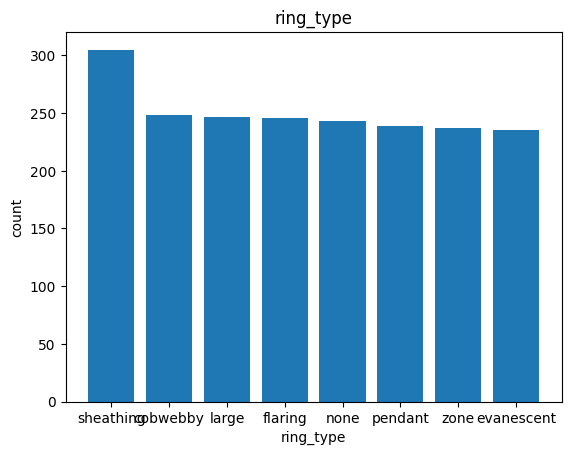

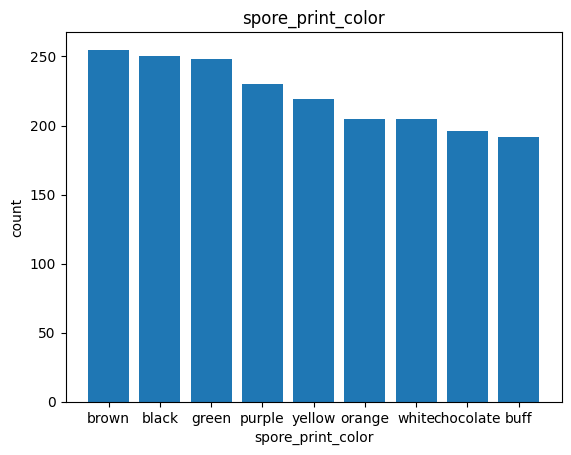

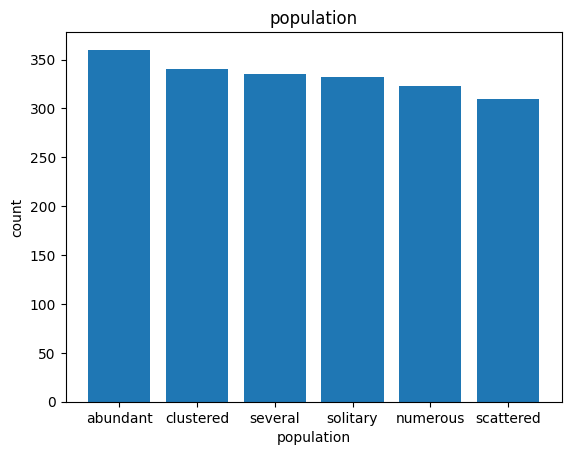

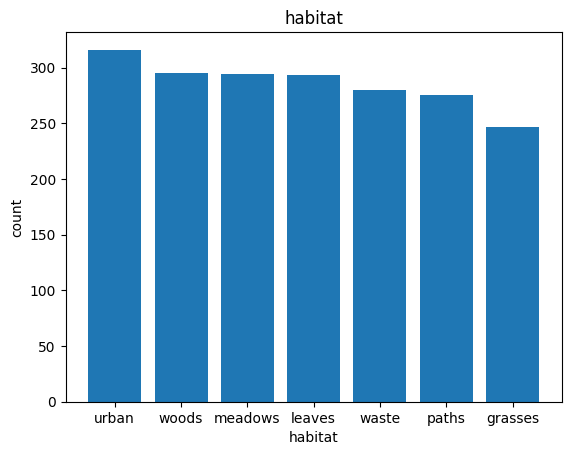

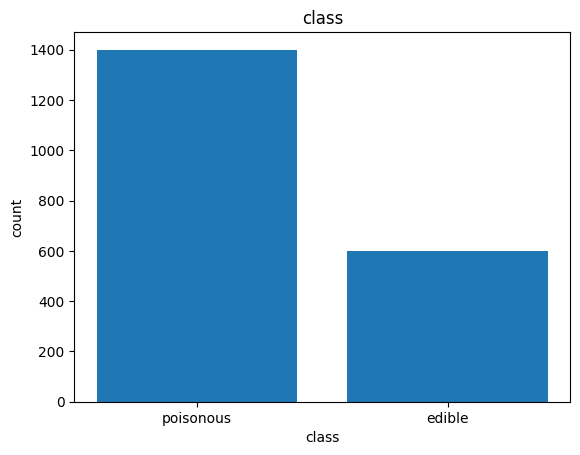

In [3]:
#bar graph
import matplotlib.pyplot as plt
categorical_cols=df.select_dtypes(include='object').columns
for col in categorical_cols:
  plt.bar(df[col].value_counts().index,df[col].value_counts().values)
  plt.xlabel(col)
  plt.ylabel('count')
  plt.title(col)
  plt.show()

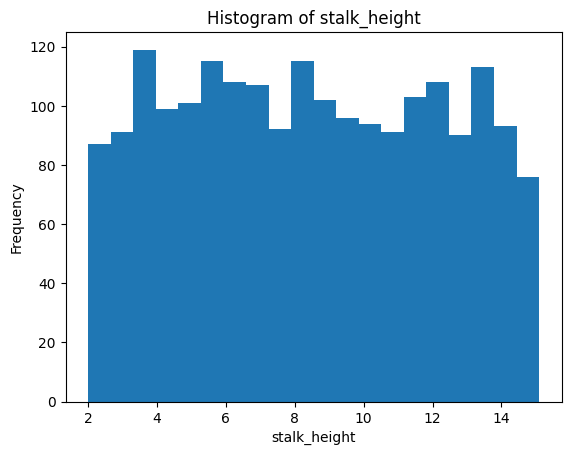

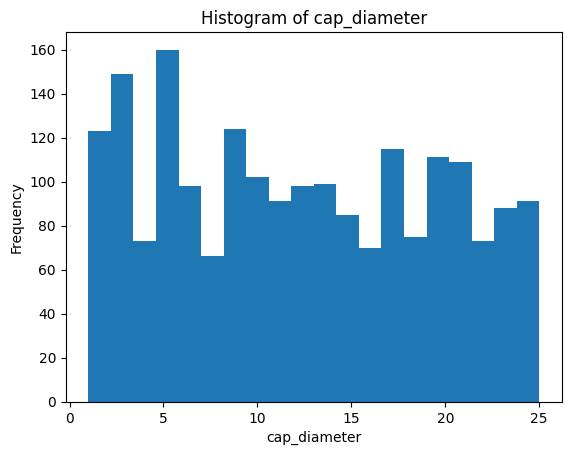

In [4]:
#histograms for numerical columns
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    plt.hist(df[col], bins=20)  # Using 20 bins as a default
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

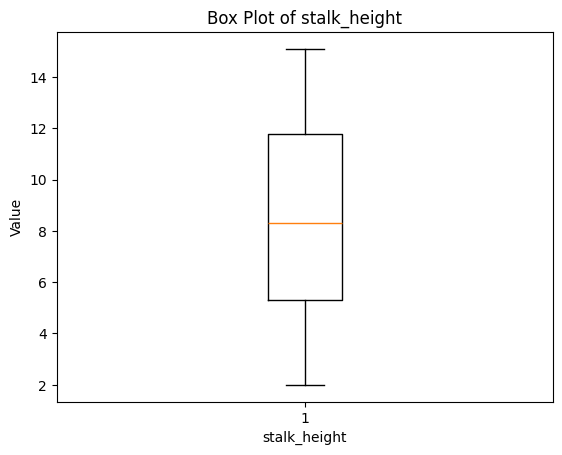

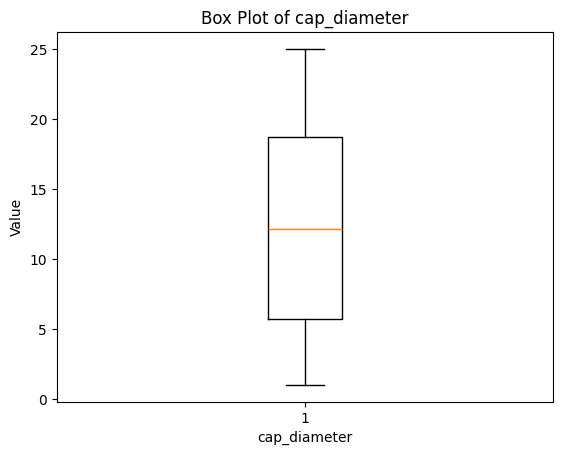

In [5]:
#box plots
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {col}')
    plt.show()

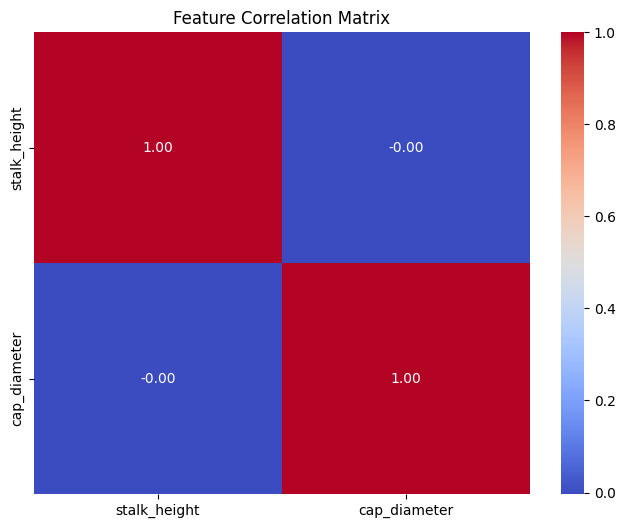

In [6]:
# Investigate feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

Task 2: Data Preprocessing

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [8]:
# Apply Label Encoding to categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

display(df)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [9]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
display(df)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,1.576459,-1.030123
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,-1.216463,0.958407
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,0.163717,-0.724904
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,-0.871852,1.222967
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,-0.695623,0.730771
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,-0.527090,0.168525
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,1.382181,-0.148193
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,0.715199,-0.552164


Task 3: Data Visualization and Data Partition

In [10]:
X = df.drop(['Unnamed: 0', 'class'], axis=1)
Y = df['class']

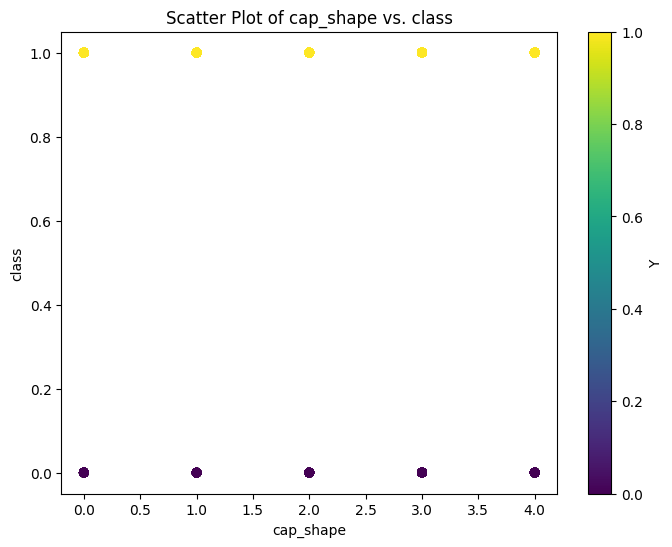

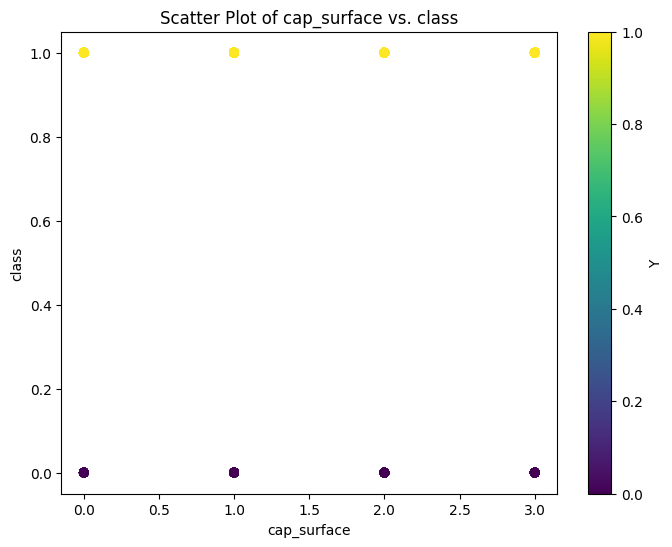

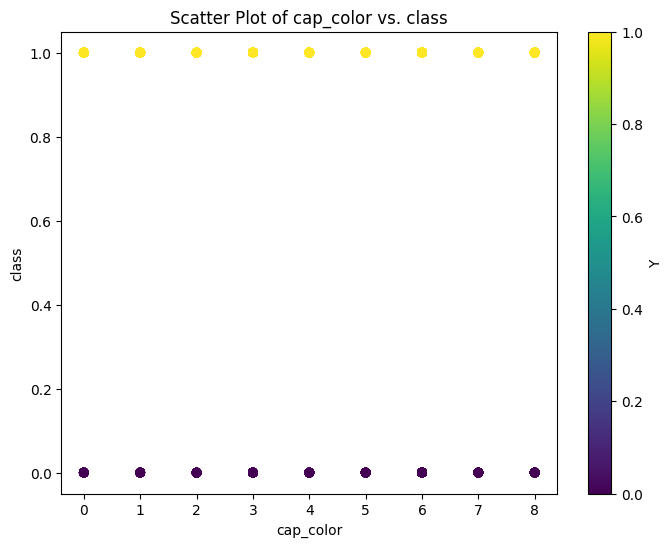

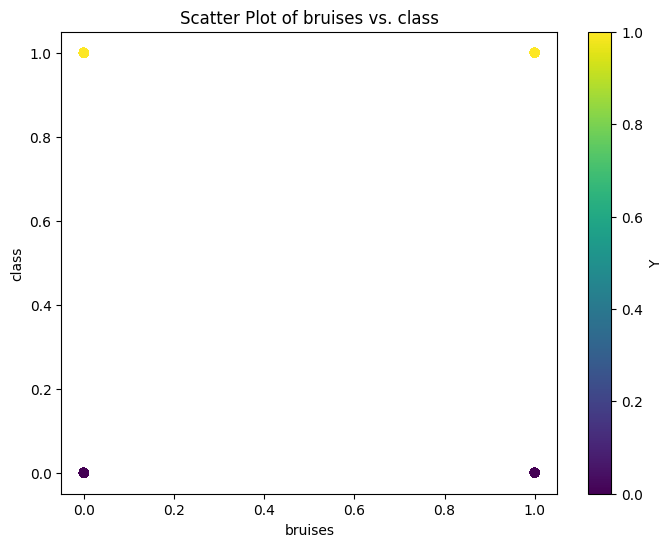

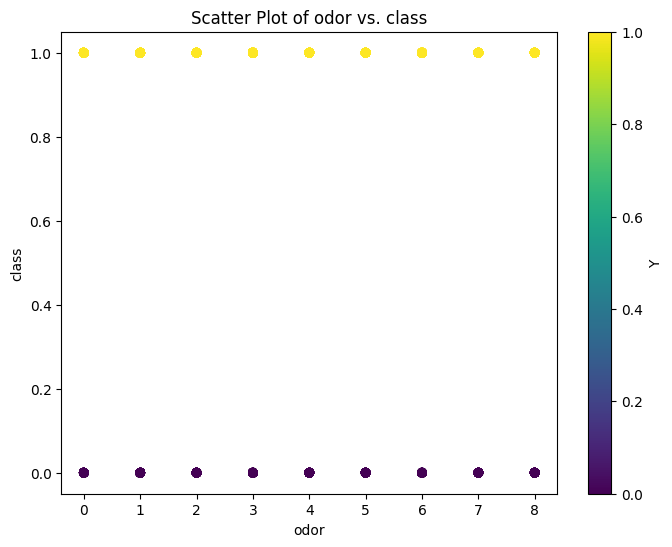

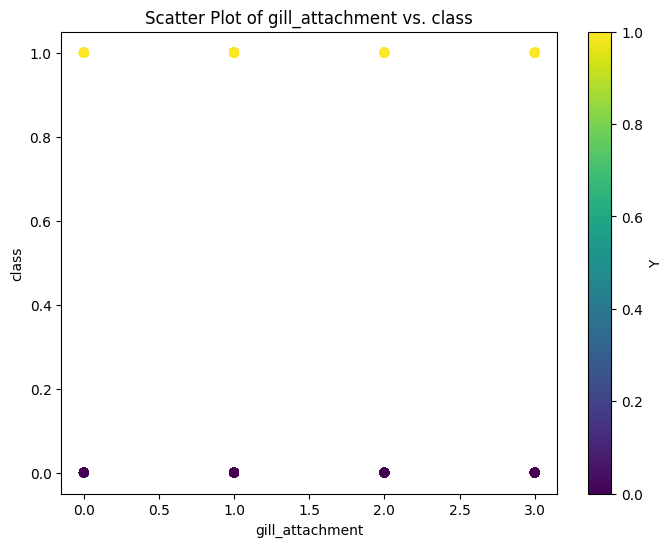

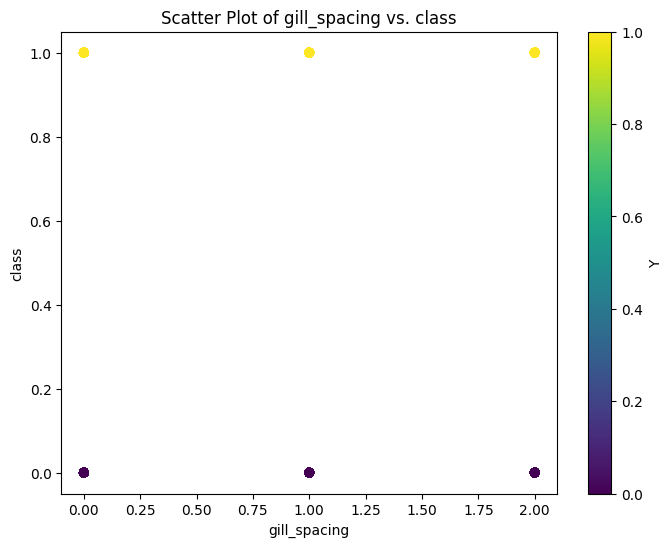

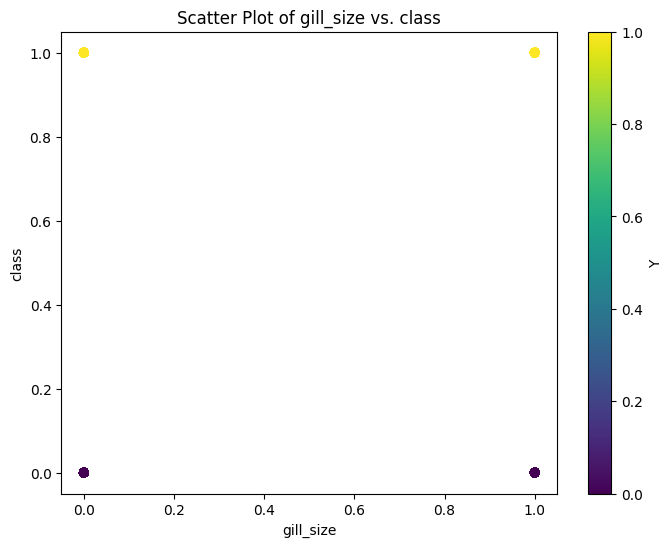

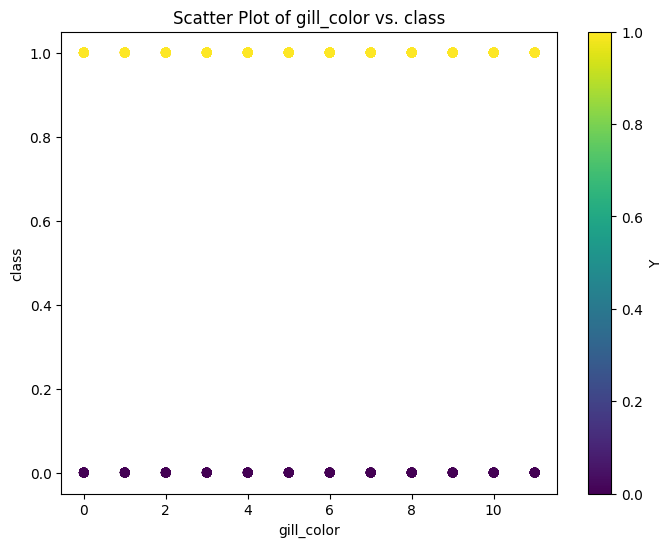

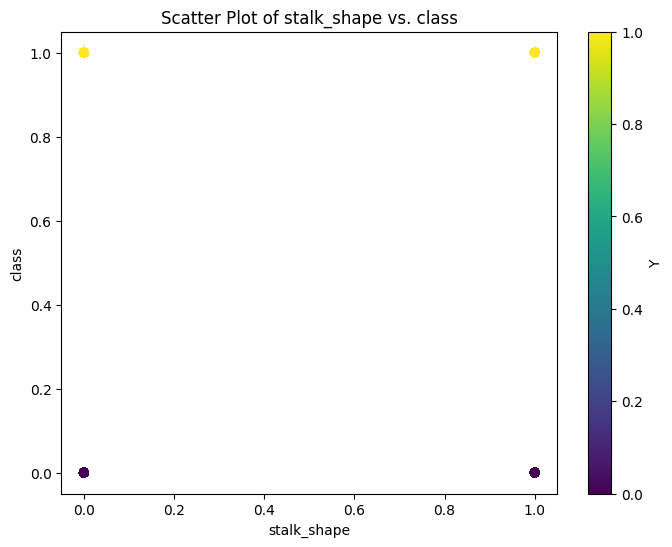

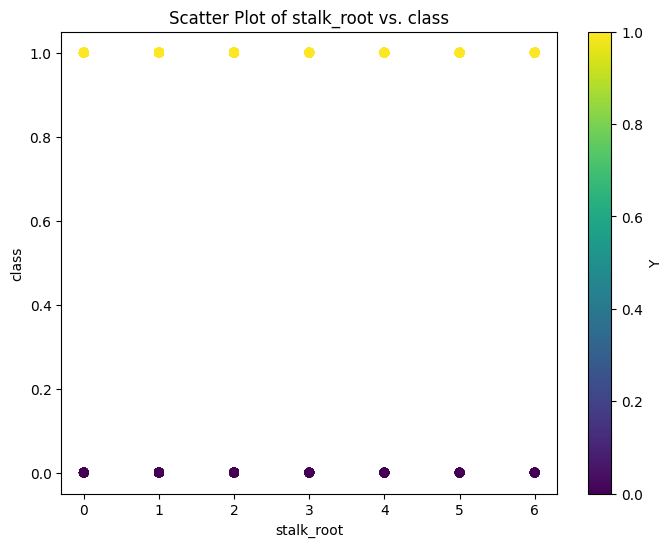

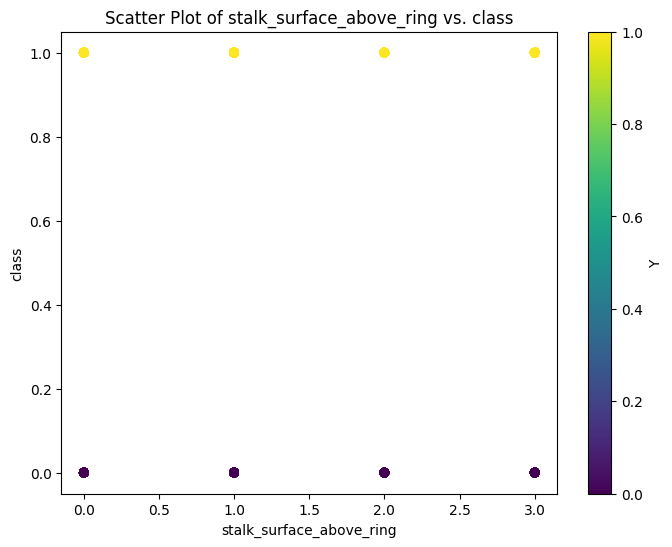

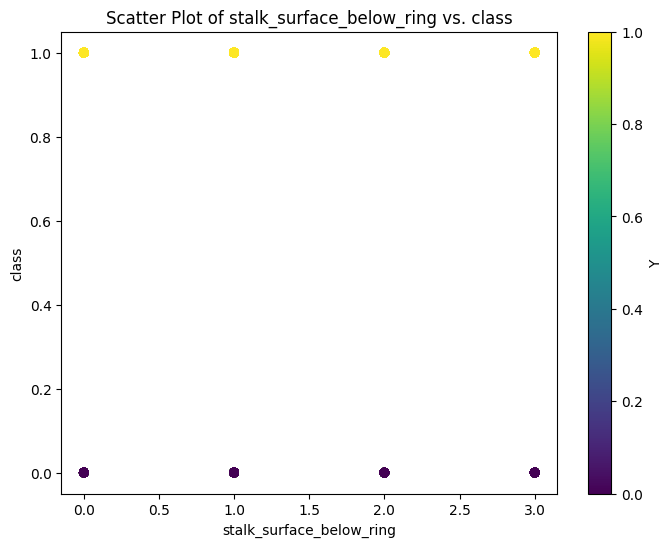

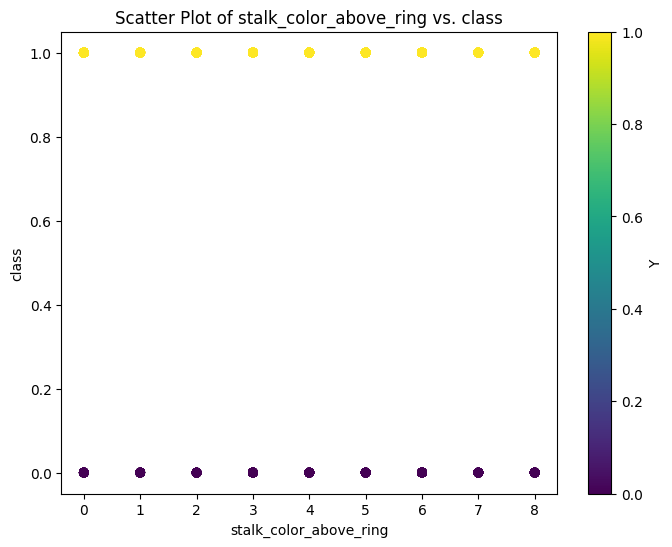

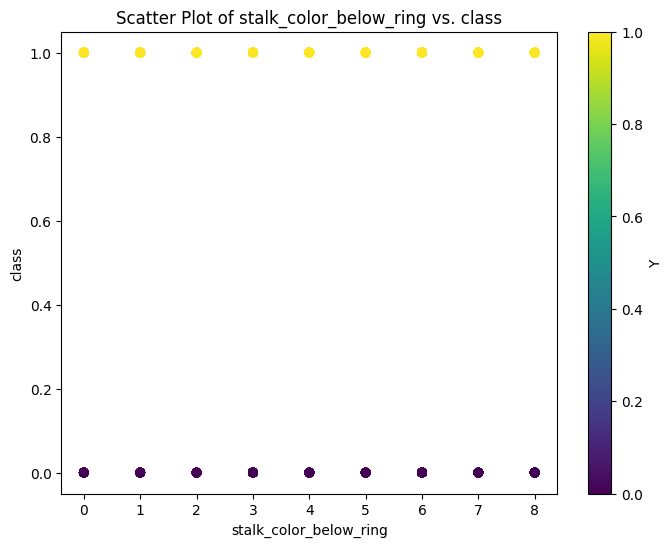

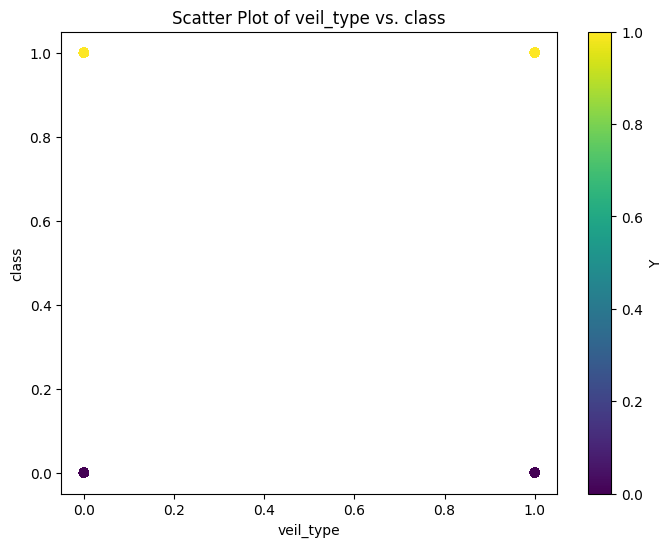

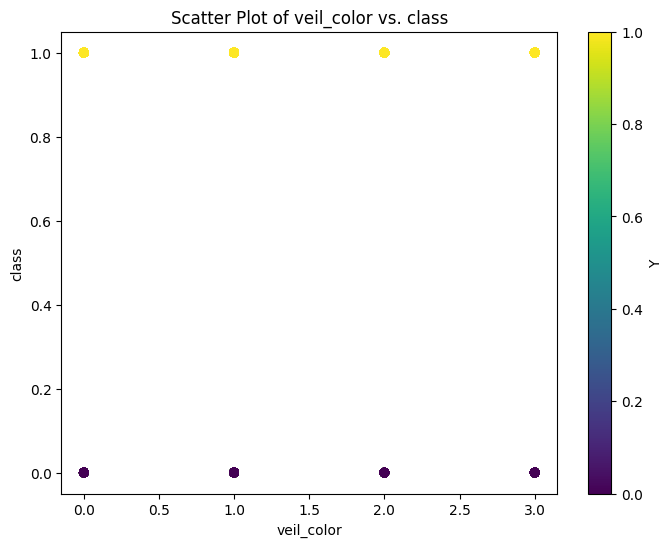

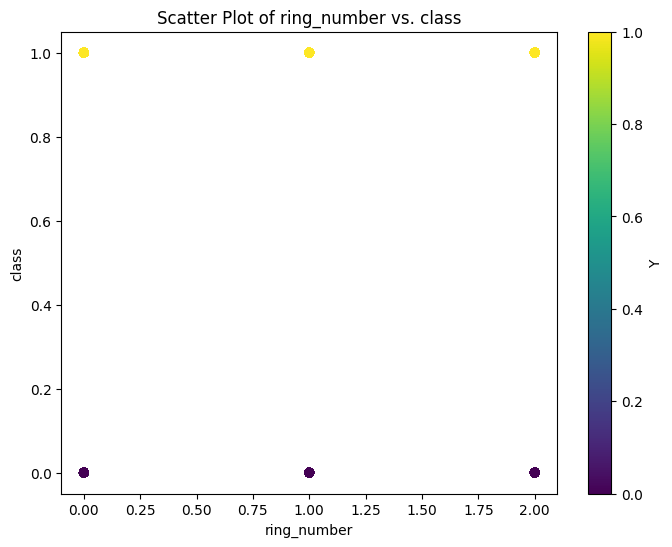

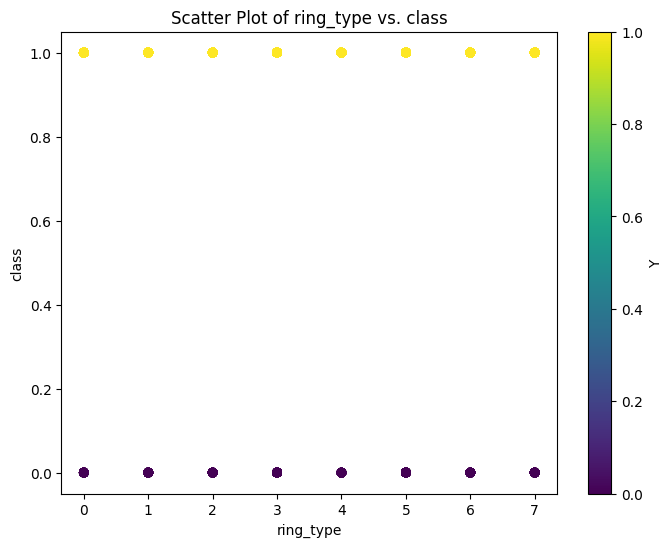

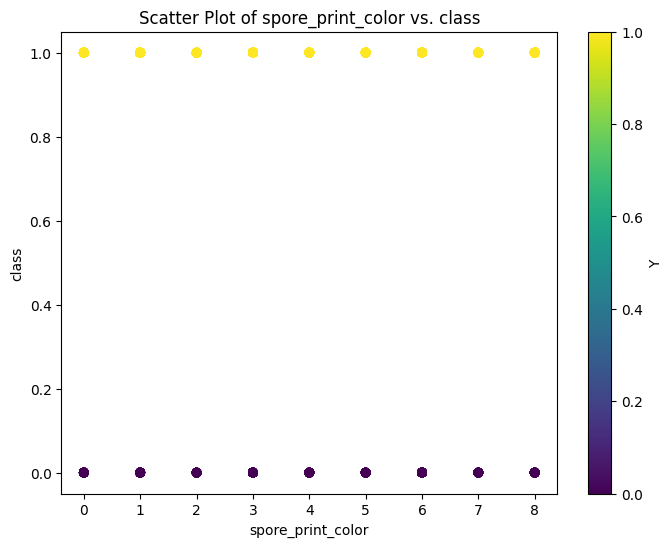

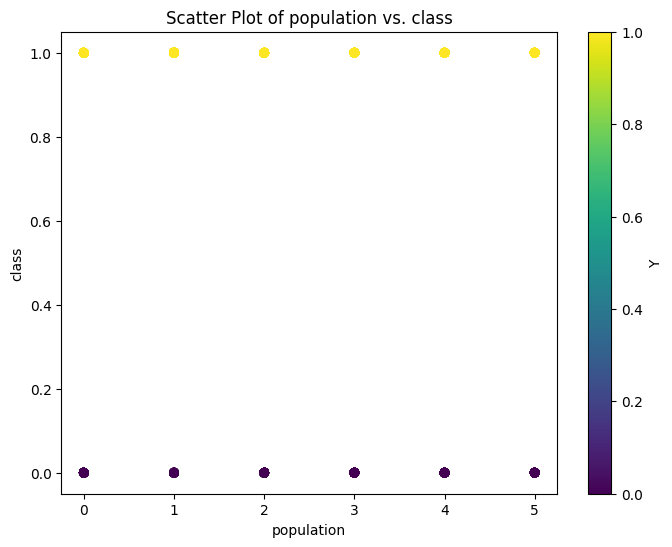

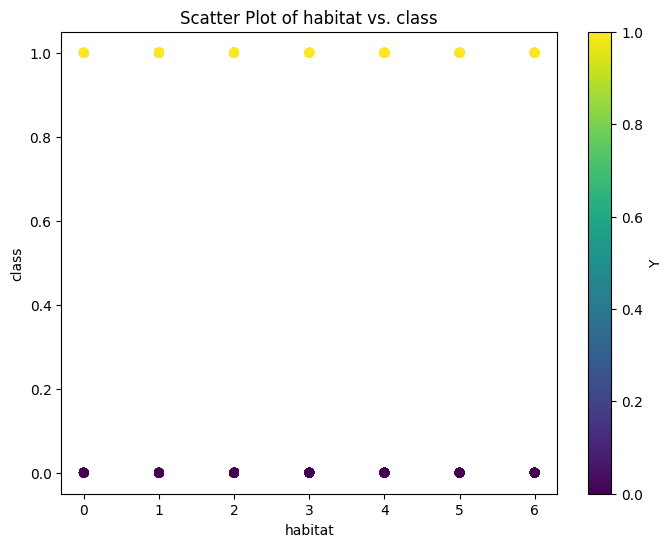

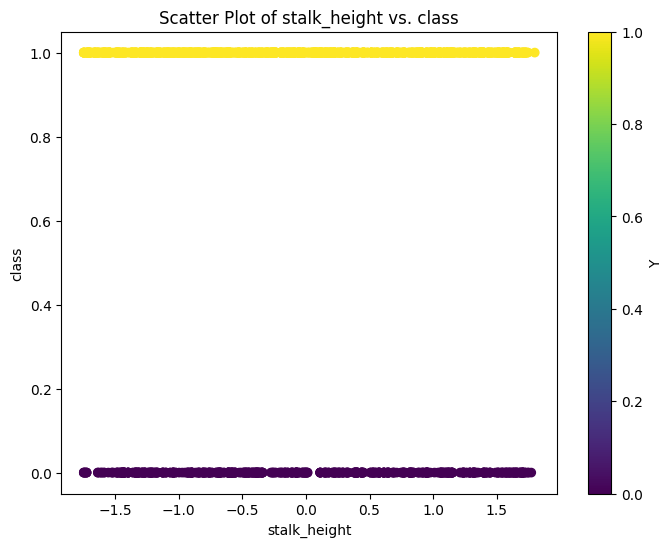

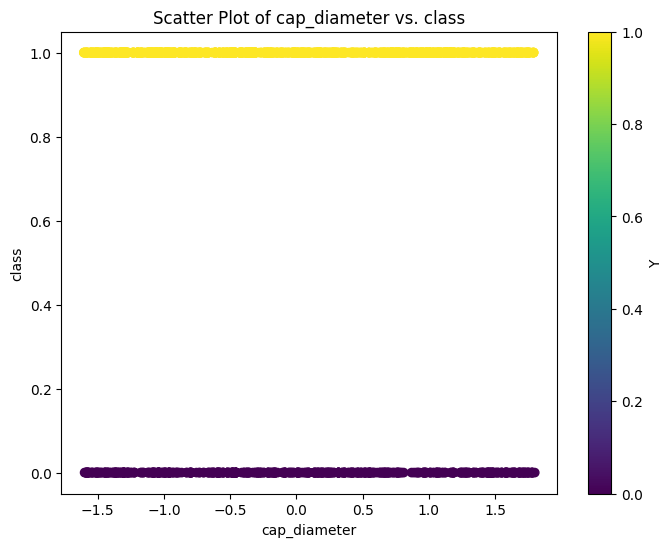

In [11]:
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[col],Y,c=Y,cmap='viridis')
    plt.xlabel(col)
    plt.ylabel('class')
    plt.title(f'Scatter Plot of {col} vs. class')
    plt.colorbar(label="Y")
    plt.show()

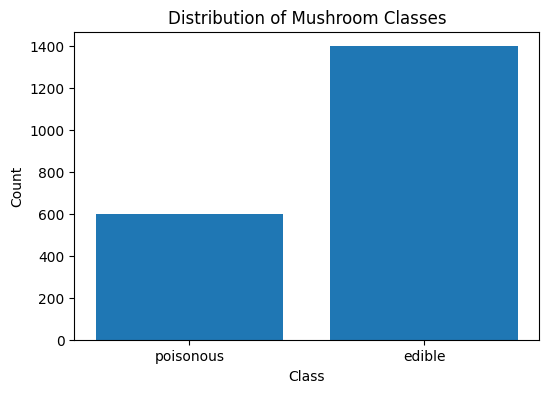

In [12]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Classes')
plt.xticks(class_counts.index, ['edible', 'poisonous']) # Assuming 0 and 1 correspond to edible and poisonous
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Task 4: SVM Implementation with various kernals

In [14]:
import numpy as np

In [15]:
#linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear',C = 1)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))

Training score: 0.71
Test score: 0.67


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate model performance on the testing data
linear_accuracy = accuracy_score(Y_test, Y_pred_test)
linear_precision = precision_score(Y_test, Y_pred_test)
linear_recall = recall_score(Y_test, Y_pred_test)
linear_f1 = f1_score(Y_test, Y_pred_test)

print(f"Linear Classifier Accuracy on testing data: {linear_accuracy:.2f}")
print(f"Linear Classifier Precision on testing data: {linear_precision:.2f}")
print(f"Linear Classifier Recall on testing data: {linear_recall:.2f}")
print(f"Linear Classifier F1-score on testing data: {linear_f1:.2f}")

Linear Classifier Accuracy on testing data: 0.67
Linear Classifier Precision on testing data: 0.67
Linear Classifier Recall on testing data: 1.00
Linear Classifier F1-score on testing data: 0.80


In [17]:
# Polynomial classifier
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=3)   # degree = 2,3,4
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))

Training score: 0.79
Test score: 0.74


In [18]:
# Evaluate model performance on the testing data
poly_accuracy = accuracy_score(Y_test, Y_pred_test)
poly_precision = precision_score(Y_test, Y_pred_test)
poly_recall = recall_score(Y_test, Y_pred_test)
poly_f1 = f1_score(Y_test, Y_pred_test)

print(f"Polynomial Classifier Accuracy on testing data: {poly_accuracy:.2f}")
print(f"Polynomial Classifier Precision on testing data: {poly_precision:.2f}")
print(f"Polynomial Classifier Recall on testing data: {poly_recall:.2f}")
print(f"Polynomial Classifier F1-score on testing data: {poly_f1:.2f}")

Polynomial Classifier Accuracy on testing data: 0.74
Polynomial Classifier Precision on testing data: 0.73
Polynomial Classifier Recall on testing data: 0.97
Polynomial Classifier F1-score on testing data: 0.83


In [19]:
# Radial basis classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))

Training score: 0.72
Test score: 0.68


In [20]:
# Evaluate model performance on the testing data
radial_accuracy = accuracy_score(Y_test, Y_pred_test)
radial_precision = precision_score(Y_test, Y_pred_test)
radial_recall = recall_score(Y_test, Y_pred_test)
radial_f1 = f1_score(Y_test, Y_pred_test)

print(f"Radial Classifier Accuracy on testing data: {radial_accuracy:.2f}")
print(f"Radial Classifie Precision on testing data: {radial_precision:.2f}")
print(f"Radial Classifie Recall on testing data: {radial_recall:.2f}")
print(f"Radial Classifie F1-score on testing data: {radial_f1:.2f}")

Radial Classifier Accuracy on testing data: 0.69
Radial Classifie Precision on testing data: 0.68
Radial Classifie Recall on testing data: 1.00
Radial Classifie F1-score on testing data: 0.81


Task 5: Visualization of SVM Results

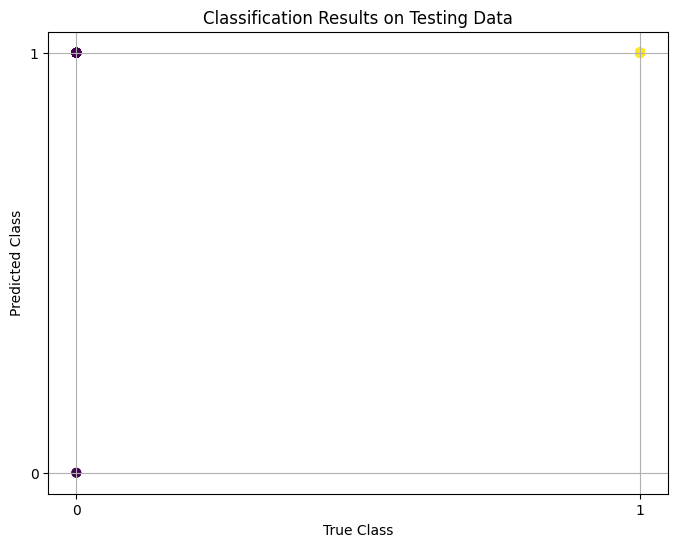

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y_test and Y_pred_test are already defined from previous steps
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test, c=Y_test, cmap='viridis', alpha=0.5)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Classification Results on Testing Data')
plt.xticks([0, 1]) # Assuming binary classification
plt.yticks([0, 1]) # Assuming binary classification
plt.grid(True)
plt.show()

Task 6: Parameter Tuning and Optimization

Experimenting with different SVM hyperparameters by using GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4] # Only relevant for the 'poly' kernel
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5) # Using 5-fold cross-validation

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
Y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred_test)
print(f"Test accuracy of the best model: {test_accuracy:.2f}")

Best parameters:  {'C': 10, 'degree': 4, 'kernel': 'poly'}
Best cross-validation score: 0.81
Test accuracy of the best model: 0.85


Task 7: Comparison and Analysis

##Performance of SVM with different kernals:

#Linear Classifier:

Linear Classifier Accuracy on testing data: 0.67

Linear Classifier Precision on testing data: 0.67

Linear Classifier Recall on testing data: 1.00

Linear Classifier F1-score on testing data: 0.80


#Polynomial Classifier:

Polynomial Classifier Accuracy on testing data: 0.74

Polynomial Classifier Precision on testing data: 0.73

Polynomial Classifier Recall on testing data: 0.97

Polynomial Classifier F1-score on testing data: 0.83

#Radial Basis Function:


Radial Classifier Accuracy on testing data: 0.69

Radial Classifie Precision on testing data: 0.68

Radial Classifie Recall on testing data: 1.00

Radial Classifie F1-score on testing data: 0.81




From the comparison the we can see that the we got the highest test accuracy for polynomial classifier.

I also applied grid search cv with all kernals and degrees and applied cross validation for that and then calculated the test accuracy, the following are the results:

Best parameters:  {'C': 10, 'degree': 4, 'kernel': 'poly'}

Best cross-validation score: 0.81

Test accuracy of the best model: 0.85

From the above results we can tell that even grid search cv implies that polynomial classifier gives the best results.

Based on the EDA and visualization results, here's an analysis of the strengths and weaknesses of using SVM for the Mushroom dataset:

**Strengths of SVM for this dataset:**

*   **Handling of high-dimensional data:** The dataset has many features, and SVMs are generally effective in high-dimensional spaces, especially with the use of kernels.
*   **Effectiveness with clear margin of separation:** The scatter plots of individual features against the 'class' show that for many categorical features, there appears to be a relatively clear separation between the classes (poisonous and edible). This suggests that SVMs, which aim to find an optimal hyperplane to separate classes, could perform well. For example, features like 'odor', 'gill_size', and 'stalk_shape' show distinct groupings for the two classes.
*   **Versatility with kernels:** The different kernel results (linear, polynomial, RBF) show varying performance, indicating that SVM can adapt to non-linear relationships in the data through the use of appropriate kernels. The polynomial kernel (degree 3 and 4) and RBF kernel achieved higher test accuracies than the linear kernel, suggesting non-linear boundaries are present.

**Weaknesses of SVM for this dataset:**

*   **Sensitivity to feature scaling:** While we performed standardization on the numerical features, SVM's performance can be sensitive to the scaling of features.
*   **Interpretability:** SVM models, especially with non-linear kernels, can be less interpretable compared to simpler models like decision trees. It's harder to understand the direct relationship between individual features and the classification outcome from the SVM model itself.
*   **Performance on overlapping data:** Some scatter plots show overlap between the classes for certain features (e.g., 'stalk_height', 'cap_diameter', and some categorical features). In cases of significant overlap, finding a perfectly separating hyperplane is not possible, and the performance of SVM might be limited, although soft margins (controlled by the 'C' parameter) can help mitigate this.
*   **Computational cost:** For very large datasets, training SVM models can be computationally expensive, especially with non-linear kernels and complex parameter tuning.

Overall, the initial results suggest that SVM is a reasonable choice for this dataset, particularly with non-linear kernels. The ability to find non-linear decision boundaries seems important given the relationships observed in the data. Further hyperparameter tuning and exploration of other kernels could potentially improve performance.

### Practical Implications of SVM in Real-World Classification Tasks

**Real-World Applications:**

Despite the weaknesses, SVMs have been successfully applied in various real-world classification tasks, including:

*   **Image Classification:** Recognizing objects and patterns in images.
*   **Text Classification:** Spam detection, sentiment analysis, and categorizing documents.
*   **Bioinformatics:** Protein classification, gene expression analysis.
*   **Handwritten Digit Recognition:** Identifying scanned handwritten digits.
*   **Face Detection:** Identifying faces in images or videos.

In conclusion, SVMs are a powerful tool for classification, particularly effective in scenarios with high-dimensional data and complex non-linear relationships. However, careful consideration of kernel and parameter selection, potential issues with interpretability and computational cost for very large datasets, and handling of imbalanced data are important for successful real-world implementation.